# Figure 5

In Figure 5, we show nonlinear, high-order epistasis fits for all data sets.

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gpmap import GenotypePhenotypeMap
from epistasis import plot
from epistasis.models import EpistasisPowerTransform, EpistasisLinearRegression

path = "../datasets/"

## Data set I

Power transform parameters: {'lmbda': -4.2746458163945737, 'A': 0.68199946231120867, 'B': -0.60783159905054251}


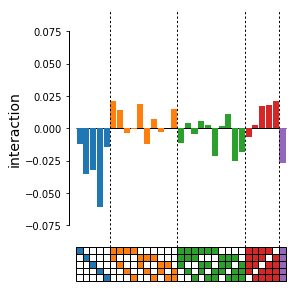

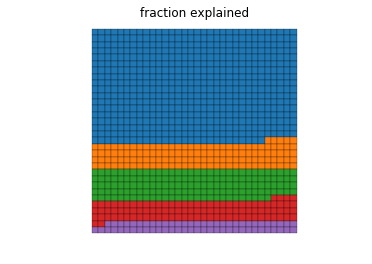

In [49]:
dataset = path + "krug1.json"

# Fit with nonlinear model
nonlinear = EpistasisPowerTransform.from_json(dataset, order=1, model_type="global", fix_linear=True)
nonlinear.fit(lmbda=-1, A=0, B=0)
print("Power transform parameters: " + str(nonlinear.parameters()))
plinear = nonlinear.transform_target()

# Fit high-order epistasis in linear phenotypes
rsq = []
for order in range(1,6):
    linear = EpistasisLinearRegression.from_data(nonlinear.gpm.wildtype, nonlinear.gpm.genotypes, plinear, model_type="global", order=order)
    linear.fit()
    rsq.append(linear.score())

# Plot the coefs
plot.coefs(linear.epistasis.values, linear.epistasis.labels, figsize=(4,5))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
fig, ax = plot.fraction_explained(frac_ex)
ax.set_title("fraction explained")

# Data set II

Power transform parameters: {'lmbda': 0.10625181598424019, 'A': 0.73522964979940453, 'B': -0.0053253615106575204}


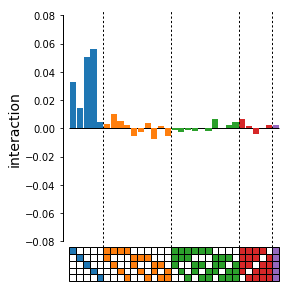

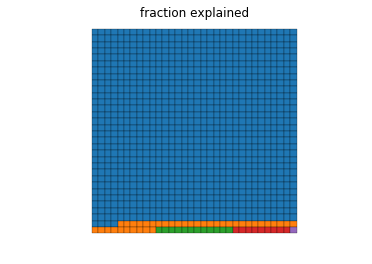

In [48]:
dataset = path + "khan.json"

# Fit with nonlinear model
nonlinear = EpistasisPowerTransform.from_json(dataset, order=1, model_type="global", fix_linear=True)
nonlinear.fit(lmbda=1, A=0, B=0)
print("Power transform parameters: " + str(nonlinear.parameters()))
plinear = nonlinear.transform_target()

# Fit high-order epistasis in linear phenotypes
rsq = []
for order in range(1,6):
    linear = EpistasisLinearRegression.from_data(nonlinear.gpm.wildtype, nonlinear.gpm.genotypes, plinear, model_type="global", order=order)
    linear.fit()
    rsq.append(linear.score())

# Plot the coefs
plot.coefs(linear.epistasis.values, linear.epistasis.labels, figsize=(4,5))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
fig, ax = plot.fraction_explained(frac_ex)
ax.set_title("fraction explained")

## Data set III

/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear/power.py:12: RuntimeWarning: overflow encountered in power
  first = (x+A)**lmbda
/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear/power.py:13: RuntimeWarning: overflow encountered in double_scalars
  out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear/power.py:13: RuntimeWarning: invalid value encountered in true_divide
  out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B


Power transform parameters: {'lmbda': 226.46878479276236, 'A': 21.657783791055138, 'B': 0.95820679573867629}


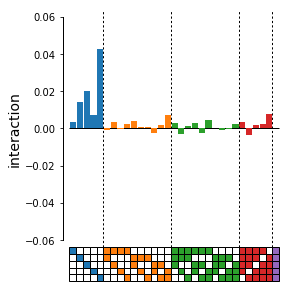

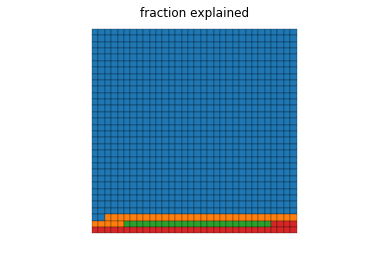

In [50]:
dataset = path + "weinreich.json"

# Fit with nonlinear model
nonlinear = EpistasisPowerTransform.from_json(dataset, order=1, model_type="global", fix_linear=True)
nonlinear.fit(lmbda=1, A=0, B=0)
print("Power transform parameters: " + str(nonlinear.parameters()))
plinear = nonlinear.transform_target()

# Fit high-order epistasis in linear phenotypes
rsq = []
for order in range(1,6):
    linear = EpistasisLinearRegression.from_data(nonlinear.gpm.wildtype, nonlinear.gpm.genotypes, plinear, model_type="global", order=order)
    linear.fit()
    rsq.append(linear.score())

# Plot the coefs
plot.coefs(linear.epistasis.values, linear.epistasis.labels, figsize=(4,5))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
fig, ax = plot.fraction_explained(frac_ex)
ax.set_title("fraction explained")

## Data set IV

Data set IV was published as $\Delta G$s, but were given to us as $k_a$s. Before fitting with a nonlinear epistasis model, we converted the values to $\Delta G$s to be consistent with the literature.

In [51]:
dataset = path + "anderson.json"

# gas constant and temperature
R = 1.9872036e-3
T = 293

gpm = GenotypePhenotypeMap.from_json(dataset)
gpm.phenotypes = - np.log(gpm.phenotypes) * R * T 

Power transform parameters: {'lmbda': 2.9278133026177411, 'A': -2.3356966586119614, 'B': 5.1589257569372}


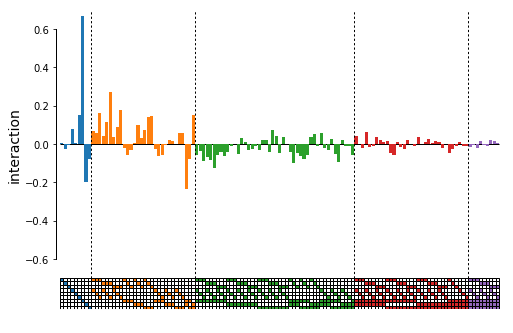

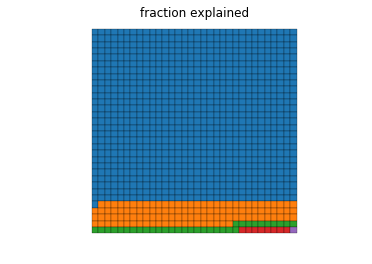

In [52]:
# Fit with nonlinear model
nonlinear = EpistasisPowerTransform.from_gpm(gpm, order=1, model_type="global", fix_linear=True)
nonlinear.fit(lmbda=1, A=-.5, B=2)
print("Power transform parameters: " + str(nonlinear.parameters()))
plinear = nonlinear.transform_target()

# Fit high-order epistasis in linear phenotypes
rsq = []
for order in range(1,6):
    linear = EpistasisLinearRegression.from_data(nonlinear.gpm.wildtype, nonlinear.gpm.genotypes, plinear, mutations=nonlinear.gpm.mutations, model_type="global", order=order)
    linear.fit()
    rsq.append(linear.score())

# Plot the coefs
plot.coefs(linear.epistasis.values, linear.epistasis.labels, figsize=(8,5.5), ybounds=(-.7, .7))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
fig, ax = plot.fraction_explained(frac_ex)
ax.set_title("fraction explained")